In [204]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import powerlaw

def powlaw(x, a, b) :
    return a * np.power(x, b)
def linlaw(x, a, b) :
    return a + x * b

def curve_fit_log(xdata, ydata) :
    """Fit data to a power law with weights according to a log scale"""
    # Weights according to a log scale
    # Apply fscalex
    xdata_log = np.log10(xdata)
    # Apply fscaley
    ydata_log = np.log10(ydata)
    # Fit linear
    popt_log, pcov_log = curve_fit(linlaw, xdata_log, ydata_log)
    print('popt log in fxn is: ',popt_log)
    # Apply fscaley^-1 to fitted data
#    ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
    ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
# There is no need to apply fscalex^-1 as original data is already available
    return (popt_log, pcov_log, ydatafit_log)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [ 1.10073536  0.03761852 -0.55872131 -0.93213232 -1.18647169 -1.36982418
 -1.50744756 -1.61389582 -1.69817718 -1.76618137 -1.82191006 -1.86816683
 -1.90699988 -1.93992043 -1.97000717 -1.99232432 -2.01337089 -2.03174716
 -2.04788381 -2.06212816]
Extrapolated CAM-B3LYP Band Gap (Struct 1 BLA 0.05):  -0.2651531572885344 -0.1135518719459021
<function <lambda> at 0x2b6c84389550>
-2.697332559920258


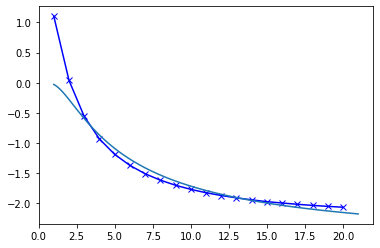

In [205]:
caps_larger=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_larger/qtp00lumos.txt',usecols=1)
caps_larger=caps_larger*27.2114
y=caps_larger
x=np.arange(1,len(caps_larger)+1)
print(x,caps_larger)
popLog, pcov_log = curve_fit(linlaw, x,caps_larger )
print("Extrapolated CAM-B3LYP Band Gap (Struct 1 BLA 0.05): ",popLog[0],popLog[1])
print(lambda t,a,b: a*np.exp(-b*t))

var=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b/t),  x,  y,  p0=(-2.0, 0.1))
print(var[0][0])
plt.plot(x,y,'b',marker='x')

xdiscrete=np.linspace(1,21,1500)
plt.plot(xdiscrete,var[0][0]*np.exp(-var[0][1]/xdiscrete))
plt.show()

[ 1.10073536  0.03761852 -0.55872131 -0.93213232 -1.18647169 -1.36982418
 -1.50744756 -1.61389582 -1.69817718 -1.76618137 -1.82191006 -1.86816683
 -1.90699988 -1.93992043 -1.97000717 -1.99232432 -2.01337089 -2.03174716
 -2.04788381 -2.06212816]
15 15
variables from optimization are:  (array([ 2.25533108,  5.31180605, -2.10701756]), array([[ 2.55005741e-03, -5.63897273e-03,  2.24815579e-04],
       [-5.63897273e-03,  1.36944627e-02, -6.11391885e-04],
       [ 2.24815579e-04, -6.11391885e-04,  3.23396295e-05]]))
predicted LUMO for infinite system is:  -2.1070175579241255


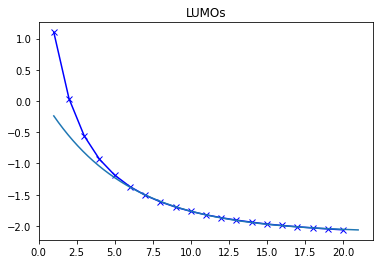

In [206]:
plt.plot(x,y,'b',marker='x')
# source:
#https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# fit E(n)= Ae^(-n/B)+C  for constants A,B,C and monomer unit 'n'
#. ln(E(n))=ln(A) -n/B +ln(C) :::: 'C' determines the infinite limit 
print(y)
y=y[5:]
x=np.arange(6,21)
print(len(x),len(y))
var=scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  x,  y,  p0=(12.0,2.7,-2.5))#p0=(-2.0, 0.1,0.1))
print('variables from optimization are: ',var)
print('predicted LUMO for infinite system is: ', var[0][2])

xdiscrete=np.linspace(1,21,1500)
plt.plot(xdiscrete,var[0][0]*np.exp(-xdiscrete/var[0][1])+var[0][2])
plt.title('LUMOs')
plt.show()

variables from optimization are:  (array([-2.4478806 ,  5.4598403 , -5.38426852]), array([[3.20063598e-03, 6.97956744e-03, 3.10674606e-04],
       [6.97956744e-03, 1.67953363e-02, 8.37325528e-04],
       [3.10674606e-04, 8.37325528e-04, 4.89594131e-05]]))
predicted HOMO for infinite system is:  -5.384268515603637


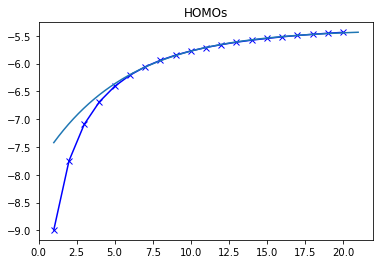

In [207]:
caps_larger=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_larger/qtp00homos.txt',usecols=1)
caps_larger=caps_larger*27.2114
y=caps_larger[5:]
x=np.arange(6,21)
plt.plot(np.arange(1,21),caps_larger,'b',marker='x')

var=scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  x,  y,  p0=(12.0,2.7,-2.5))#p0=(-2.0, 0.1,0.1))
print('variables from optimization are: ',var)
print('predicted HOMO for infinite system is: ', var[0][2])

xdiscrete=np.linspace(1,21,1500)
plt.plot(xdiscrete,var[0][0]*np.exp(-xdiscrete/var[0][1])+var[0][2])
plt.title('HOMOs')
plt.show()

In [208]:
# source:
#https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# fit E(n)= Ae^(-n/B)+C  for constants A,B,C and monomer unit 'n'
#. ln(E(n))=ln(A) -n/B +ln(C) :::: 'C' determines the infinite limit 
def extrapolate(x,y):
    var=scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t/b)+c,  x,  y,  p0=(12.0,2.7,(min(y)+max(y))/2)) #-2.5))
    print('variables from optimization are: \n',var)
    print('\n predicted HOMO for infinite system is: ', var[0][2])
    return var

def getData(paths,startExt,endExt,doubleColFile=0): #array of paths, and the startExt <= n <= endExt
    energyData=[]
    fitCoeff=[]
    for dataFile in paths:
        print('**************************************************')
        print('************************************************** \n \n')
        print('STRUCTURE & DFT FUNCTIONAL: \n')
        print(dataFile)
        print('\n')
        yData=np.loadtxt(str(dataFile),usecols=doubleColFile)
        yData=yData*27.2114
        energyData.append(yData)
        
        # extrapolation only deals with geometries >= startExt
        yData=yData[startExt-1:] #must include index 0
        xData=np.arange(startExt,endExt+1) #inclusive startExt
        
        var=extrapolate(xData,yData)
        fitCoeff.append(var[0]) ######
        print('Fit coefficients to E(n)=A*exp(-n/B)+C are: ',var[0])
        print('**************************************************')
        print('**************************************************\n \n')
        
    return energyData,fitCoeff
        
        


# CAM-B3LYP BG of tPA using revised software:

## CAMB3LYP HOMO tPA

In [209]:
s1='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_larger/qtp00homos.txt'
s2='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_smaller/qtp00homos.txt'
s3='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_136_144/qtp00homos.txt'
s4='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_137_143/qtp00homos.txt'
s5='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_138_142/qtp00homos.txt'
s6='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_139_141/qtp00homos.txt'

paths=[s1,s2,s3,s4,s5,s6]
tPA_CAMB3LYP_HOMO,tPA_CAMB3LYP_HOMOfitCoeff=getData(paths,startExt=6,endExt=20,doubleColFile=1)

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_larger/qtp00homos.txt


variables from optimization are: 
 (array([-2.44788083,  5.45983973, -5.38426854]), array([[3.20067141e-03, 6.97957153e-03, 3.10674694e-04],
       [6.97957153e-03, 1.67951607e-02, 8.37316504e-04],
       [3.10674694e-04, 8.37316504e-04, 4.89589246e-05]]))

 predicted HOMO for infinite system is:  -5.384268543925535
Fit coefficients to E(n)=A*exp(-n/B)+C are:  [-2.44788083  5.45983973 -5.38426854]
**************************************************
**************************************************
 

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_smaller/qtp00homos.txt


variables from optimization

## CAMB3LYP LUMO of tPA

In [210]:
s1='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_larger/qtp00lumos.txt'
s2='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_smaller/qtp00lumos.txt'
s3='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_136_144/qtp00lumos.txt'
s4='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_137_143/qtp00lumos.txt'
s5='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_138_142/qtp00lumos.txt'
s6='/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_139_141/qtp00lumos.txt'

paths=[s1,s2,s3,s4,s5,s6]
tPA_CAMB3LYP_LUMO,tPA_CAMB3LYP_LUMOfitCoeff=getData(paths,startExt=6,endExt=20,doubleColFile=1)
print(tPA_CAMB3LYP_LUMOfitCoeff)

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_larger/qtp00lumos.txt


variables from optimization are: 
 (array([ 2.25533108,  5.31180604, -2.10701756]), array([[ 2.55005683e-03, -5.63897297e-03,  2.24815588e-04],
       [-5.63897297e-03,  1.36944671e-02, -6.11392076e-04],
       [ 2.24815588e-04, -6.11392076e-04,  3.23396382e-05]]))

 predicted HOMO for infinite system is:  -2.107017557789682
Fit coefficients to E(n)=A*exp(-n/B)+C are:  [ 2.25533108  5.31180604 -2.10701756]
**************************************************
**************************************************
 

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_smaller/qtp00lumos.txt


variables from opt

var is:  [-2.44788083  5.45983973 -5.38426854]
var is:  [ 2.25533108  5.31180604 -2.10701756]
6


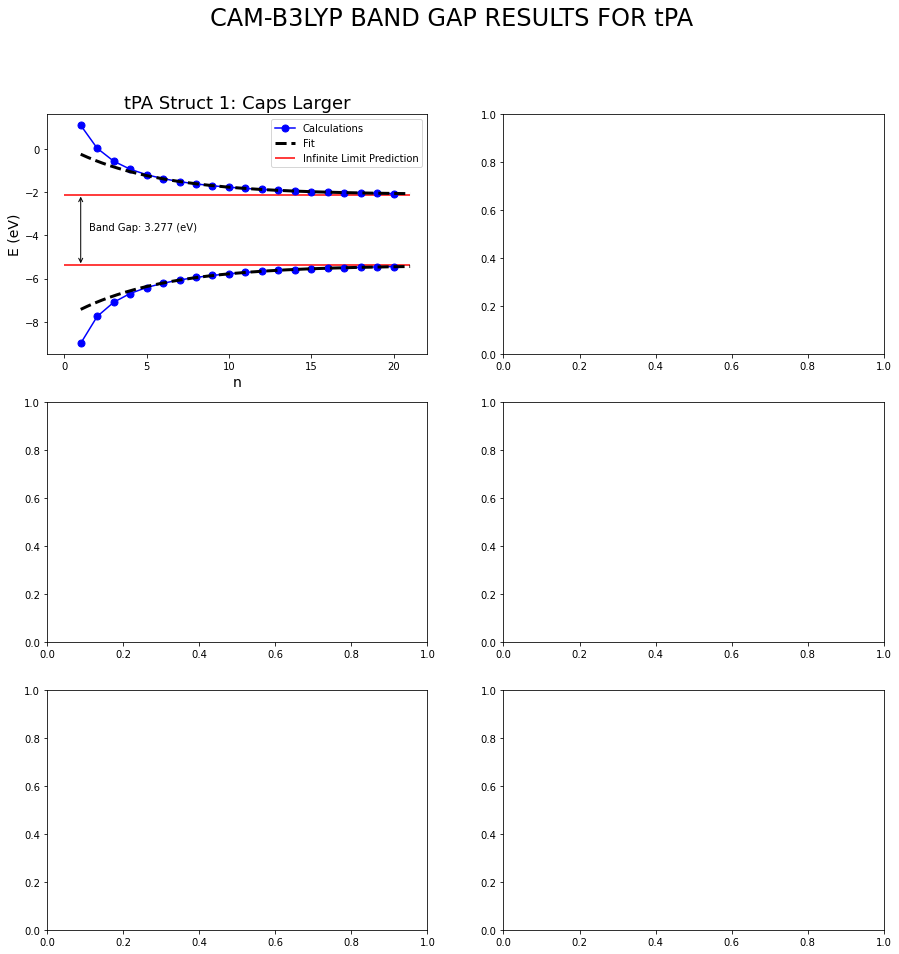

In [211]:
#### MAKE THIS INTO A FUNCTION TO AUTOMATE TASK
####

xData=np.arange(1,21)
# create 3x2 image of final results
fig, axs = plt.subplots(3, 2,figsize=(15,15))
fig.suptitle('CAM-B3LYP BAND GAP RESULTS FOR tPA',fontsize=24)
temp=[tPA_CAMB3LYP_HOMO[0],tPA_CAMB3LYP_LUMO[0]]
extrapResults=[tPA_CAMB3LYP_HOMOfitCoeff,tPA_CAMB3LYP_LUMOfitCoeff]
extrapX=np.linspace(1,21,500)
for i in range(len(temp)):
    var=extrapResults[i]
    print('var is: ',var[0])
    if (i==0):
        A=tPA_CAMB3LYP_HOMOfitCoeff[0][0] # ** WILL NEED TO CHANGE INSIDE INDEX [X][etc]
        B=tPA_CAMB3LYP_HOMOfitCoeff[0][1]
        C=tPA_CAMB3LYP_HOMOfitCoeff[0][2]
        axs[0,0].plot(xData,temp[i],color='b',marker='o',ms=7,label="Calculations")
        axs[0,0].plot(extrapX,A*np.exp(-extrapX/B)+C,color='black',ls='--',linewidth=3,label=r'Fit')
        axs[0,0].hlines(C,0,21,colors='r',label='Infinite Limit Prediction')
    else:
        axs[0,0].plot(xData,temp[i],color='b',marker='o',ms=7)
        A=tPA_CAMB3LYP_LUMOfitCoeff[0][0] # ** WILL NEED TO CHANGE INSIDE INDEX [X][etc]
        B=tPA_CAMB3LYP_LUMOfitCoeff[0][1]
        C=tPA_CAMB3LYP_LUMOfitCoeff[0][2]
        axs[0,0].plot(extrapX,A*np.exp(-extrapX/B)+C,color='black',ls='--',linewidth=3)
        axs[0,0].hlines(C,0,21,colors='r')
        
BandGap=(tPA_CAMB3LYP_LUMOfitCoeff[0][2]-tPA_CAMB3LYP_HOMOfitCoeff[0][2])
mdpt=(BandGap/2.0)+tPA_CAMB3LYP_HOMOfitCoeff[0][2]
axs[0,0].annotate("",xy=(1,tPA_CAMB3LYP_HOMOfitCoeff[0][2]),xycoords='data',xytext=(1,tPA_CAMB3LYP_LUMOfitCoeff[0][2]),textcoords='data',arrowprops=dict(arrowstyle="<->",connectionstyle="arc3"))   
axs[0,0].annotate("Band Gap: %1.3f (eV) " %BandGap,xy=(1.5,mdpt))#0,-4,"Predicted Band Gap: %d " %BandGap)
axs[0,0].set_title('tPA Struct 1: Caps Larger',fontsize=18)
axs[0,0].legend()
axs[0,0].set_xlabel('n',fontsize=14)
axs[0,0].set_ylabel('E (eV)',fontsize=14)
print(len(tPA_CAMB3LYP_HOMO))


In [212]:
np.arange(1,21)
d=[3,2]
t=[[x,y] for y in range(d[1]) for x in range(d[0])]
t

[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1]]

In [213]:
def pltHOMOLUMO(TheoryName,StructureName,HOMOdata,LUMOdata,HOMOfit,LUMOfit,pltDim):
    xData=np.arange(1,21)
# create 3x2 image of final results
    fig, axs = plt.subplots(pltDim[0], pltDim[1],figsize=(15,20))
    fig.suptitle('\n \n %s BAND GAP RESULTS FOR tPA' %TheoryName,fontsize=24)
    returnBG=[]
    for j in range(len(HOMOdata)):
#        Xaxis_iterate=j%3
#        if (j>2):
#            Yaxis_iterate=1
#        else:
#            Yaxis_iterate=0
            
        pltDimIndx=[[x,y] for y in range(pltDim[1]) for x in range(pltDim[0])]
        Xaxis_iterate=pltDimIndx[j][0]
        Yaxis_iterate=pltDimIndx[j][1]
        
        temp=[HOMOdata[j],LUMOdata[j]]
        extrapResults=[HOMOfit,LUMOfit]
        extrapX=np.linspace(1,21,500)
        
        for i in range(len(temp)):
            var=extrapResults[i]
            print('var is: ',var[0])
            if (i==0):
                A=HOMOfit[j][0] # ** WILL NEED TO CHANGE INSIDE INDEX [X][etc]
                B=HOMOfit[j][1]
                C=HOMOfit[j][2]
                axs[Xaxis_iterate,Yaxis_iterate].plot(xData,temp[i],color='b',marker='o',ms=7,label="%s Calculations" %TheoryName)
                axs[Xaxis_iterate,Yaxis_iterate].plot(extrapX,A*np.exp(-extrapX/B)+C,color='black',ls='--',linewidth=3,label=r'Fit')
                axs[Xaxis_iterate,Yaxis_iterate].hlines(C,0,21,colors='r',label='Infinite Limit Prediction')
            else:
                axs[Xaxis_iterate,Yaxis_iterate].plot(xData,temp[i],color='b',marker='o',ms=7)
                A=LUMOfit[j][0] # ** WILL NEED TO CHANGE INSIDE INDEX [X][etc]
                B=LUMOfit[j][1]
                C=LUMOfit[j][2]
                axs[Xaxis_iterate,Yaxis_iterate].plot(extrapX,A*np.exp(-extrapX/B)+C,color='black',ls='--',linewidth=3)
                axs[Xaxis_iterate,Yaxis_iterate].hlines(C,0,21,colors='r')
        
        BandGap=(LUMOfit[j][2]-HOMOfit[j][2])
        returnBG.append(BandGap)
        print('iteration and BG: ',j,BandGap)
        mdpt=(BandGap/2.0)+HOMOfit[j][2]
        axs[Xaxis_iterate,Yaxis_iterate].annotate("",xy=(1,HOMOfit[j][2]),xycoords='data',xytext=(1,LUMOfit[j][2]),textcoords='data',arrowprops=dict(arrowstyle="<->",connectionstyle="arc3"))   
        axs[Xaxis_iterate,Yaxis_iterate].annotate("Band Gap: %1.3f (eV) " %BandGap,xy=(1.5,mdpt))#0,-4,"Predicted Band Gap: %d " %BandGap)
        axs[Xaxis_iterate,Yaxis_iterate].set_title('tPA Struct %i: %s'%(j,StructureName[j]),fontsize=18)
        axs[Xaxis_iterate,Yaxis_iterate].legend()
        axs[Xaxis_iterate,Yaxis_iterate].set_xlabel('n',fontsize=14)
        axs[Xaxis_iterate,Yaxis_iterate].set_ylabel('E (eV)',fontsize=14)
    return returnBG

var is:  [-2.44788083  5.45983973 -5.38426854]
var is:  [ 2.25533108  5.31180604 -2.10701756]
iteration and BG:  0 3.2772509861358534
var is:  [-2.44788083  5.45983973 -5.38426854]
var is:  [ 2.25533108  5.31180604 -2.10701756]
iteration and BG:  1 2.906100533698699
var is:  [-2.44788083  5.45983973 -5.38426854]
var is:  [ 2.25533108  5.31180604 -2.10701756]
iteration and BG:  2 3.7962557892207087
var is:  [-2.44788083  5.45983973 -5.38426854]
var is:  [ 2.25533108  5.31180604 -2.10701756]
iteration and BG:  3 3.459965030987206
var is:  [-2.44788083  5.45983973 -5.38426854]
var is:  [ 2.25533108  5.31180604 -2.10701756]
iteration and BG:  4 3.1011095166799127
var is:  [-2.44788083  5.45983973 -5.38426854]
var is:  [ 2.25533108  5.31180604 -2.10701756]
iteration and BG:  5 2.709542399039704


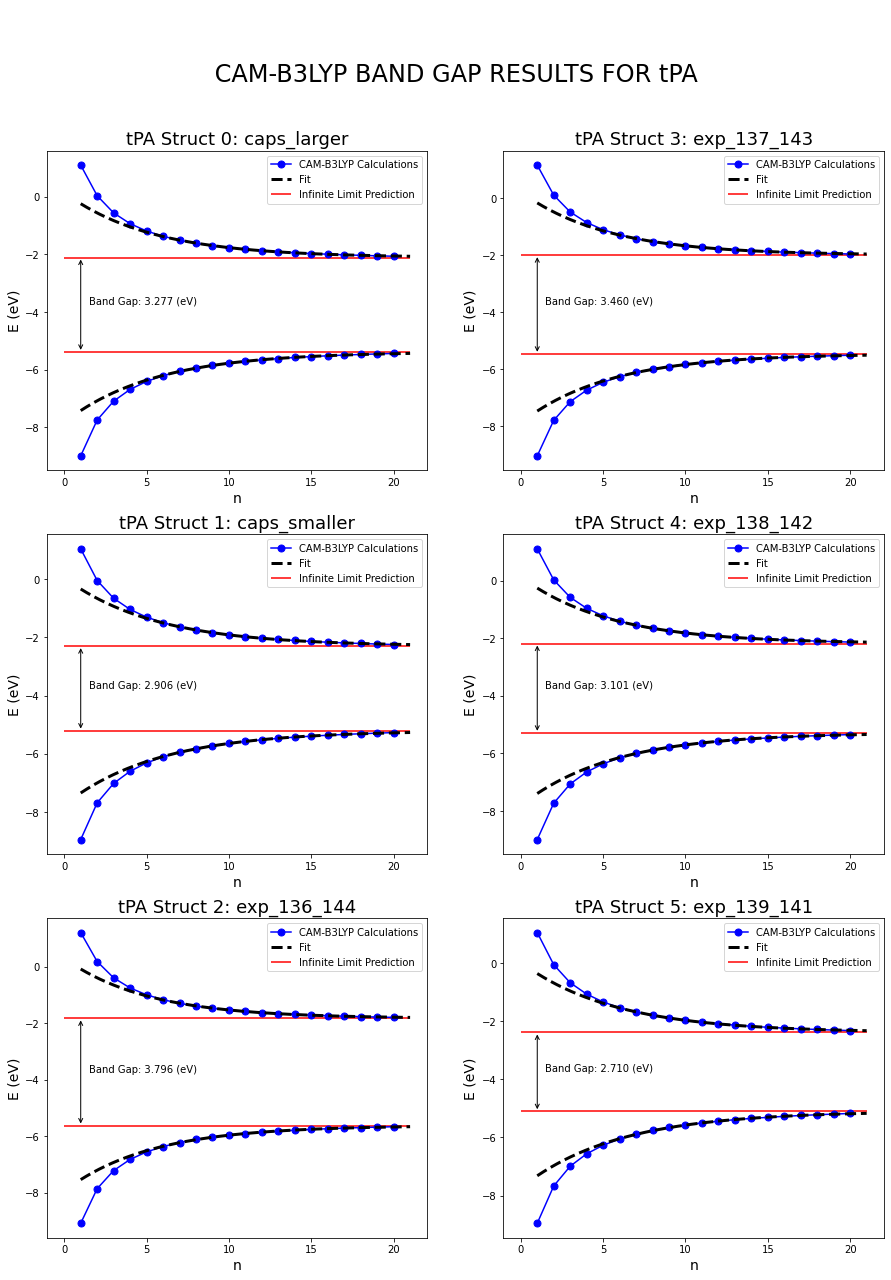

In [214]:
structs=['caps_larger','caps_smaller','exp_136_144','exp_137_143','exp_138_142','exp_139_141']
camb3lypBG=pltHOMOLUMO('CAM-B3LYP',structs,tPA_CAMB3LYP_HOMO,tPA_CAMB3LYP_LUMO,tPA_CAMB3LYP_HOMOfitCoeff,tPA_CAMB3LYP_LUMOfitCoeff,[3,2])

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/qtp00/caps_larger/qtp00lumos.txt


variables from optimization are: 
 (array([ 2.55793609,  5.0743371 , -1.31918742]), array([[ 3.72753266e-03, -6.50290901e-03,  2.79703533e-04],
       [-6.50290901e-03,  1.23704308e-02, -5.95755603e-04],
       [ 2.79703533e-04, -5.95755603e-04,  3.46188913e-05]]))

 predicted HOMO for infinite system is:  -1.319187420464195
Fit coefficients to E(n)=A*exp(-n/B)+C are:  [ 2.55793609  5.0743371  -1.31918742]
**************************************************
**************************************************
 

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/qtp00/caps_smaller/qtp00lumos.txt


variables from optimization are: 
 (array([ 2.6902739 ,  5.23783444,

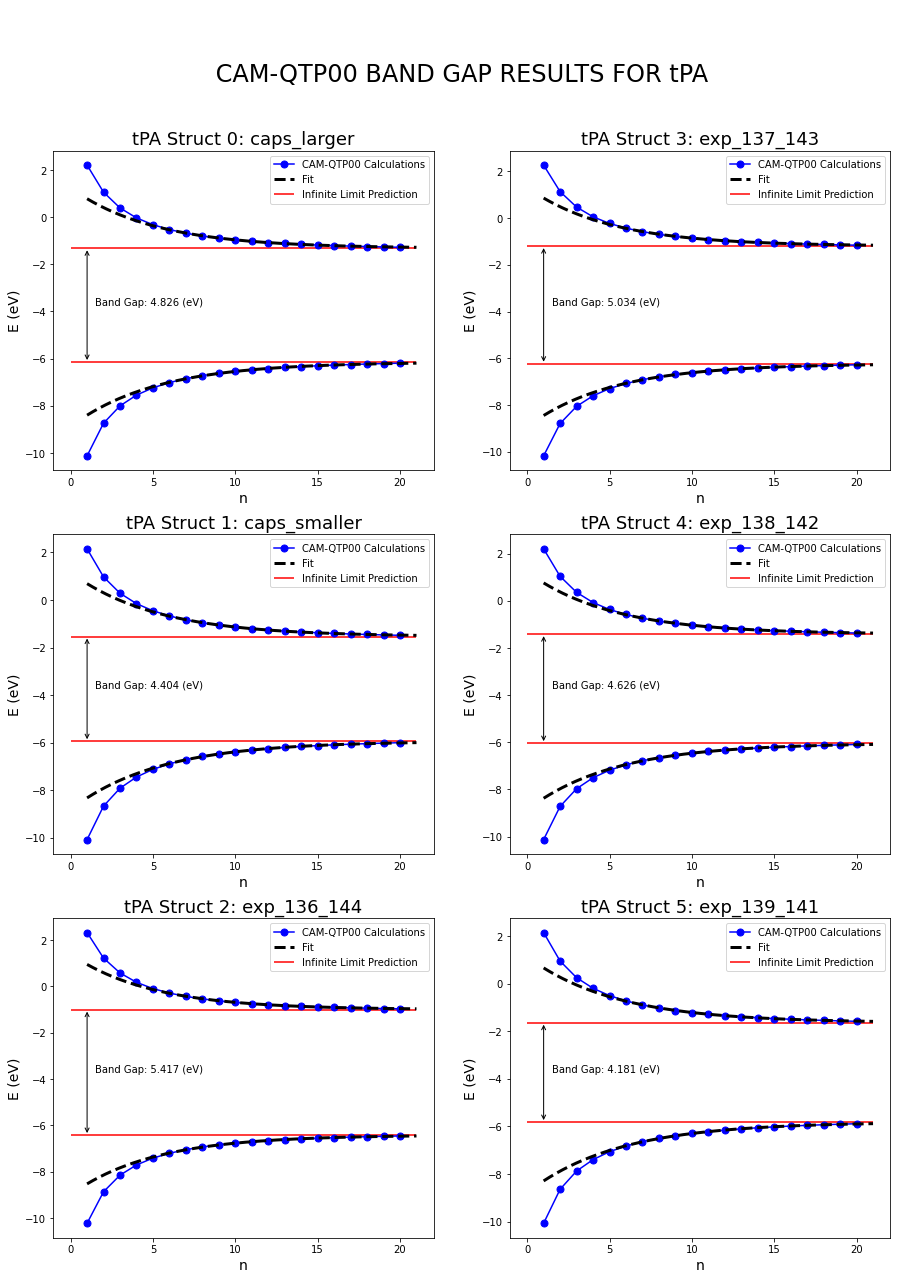

In [215]:
#define info for QTP00
parentDir=['/blue/bartlett/z.windom/pyscf/acenes/qtp00/']
structs=['caps_larger','caps_smaller','exp_136_144','exp_137_143','exp_138_142','exp_139_141']
harvestHOMO=['/qtp00homos.txt']
harvestLUMO=['/qtp00lumos.txt']

# https://stackoverflow.com/questions/12935194/combinations-between-two-lists
HOMOpath=[ x+y+z for x in parentDir for y in structs for z in harvestHOMO]
LUMOpath=[ x+y+z for x in parentDir for y in structs for z in harvestLUMO]

#for x in dirNameHOMO:
#    print(x,'\n')
    
#for x in dirNameLUMO:
#    print(x,'\n')
    
    
tPA_QTP00_LUMO,tPA_QTP00_LUMOfitCoeff=getData(LUMOpath,startExt=6,endExt=20,doubleColFile=1)
tPA_QTP00_HOMO,tPA_QTP00_HOMOfitCoeff=getData(HOMOpath,startExt=6,endExt=20,doubleColFile=1)


qtp00BG=pltHOMOLUMO('CAM-QTP00',structs,tPA_QTP00_HOMO,tPA_QTP00_LUMO,tPA_QTP00_HOMOfitCoeff,tPA_QTP00_LUMOfitCoeff,[3,2])

# tPA BAND GAP FOR QTP01

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/caps_larger/qtp00lumos.txt


variables from optimization are: 
 (array([ 2.52464055,  5.06837706, -1.3459713 ]), array([[ 3.58789249e-03, -6.32395169e-03,  2.68107652e-04],
       [-6.32395169e-03,  1.21521717e-02, -5.76855830e-04],
       [ 2.68107652e-04, -5.76855830e-04,  3.30564366e-05]]))

 predicted HOMO for infinite system is:  -1.3459712995608848
Fit coefficients to E(n)=A*exp(-n/B)+C are:  [ 2.52464055  5.06837706 -1.3459713 ]
**************************************************
**************************************************
 

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/caps_smaller/qtp00lumos.txt


variables from optimiza

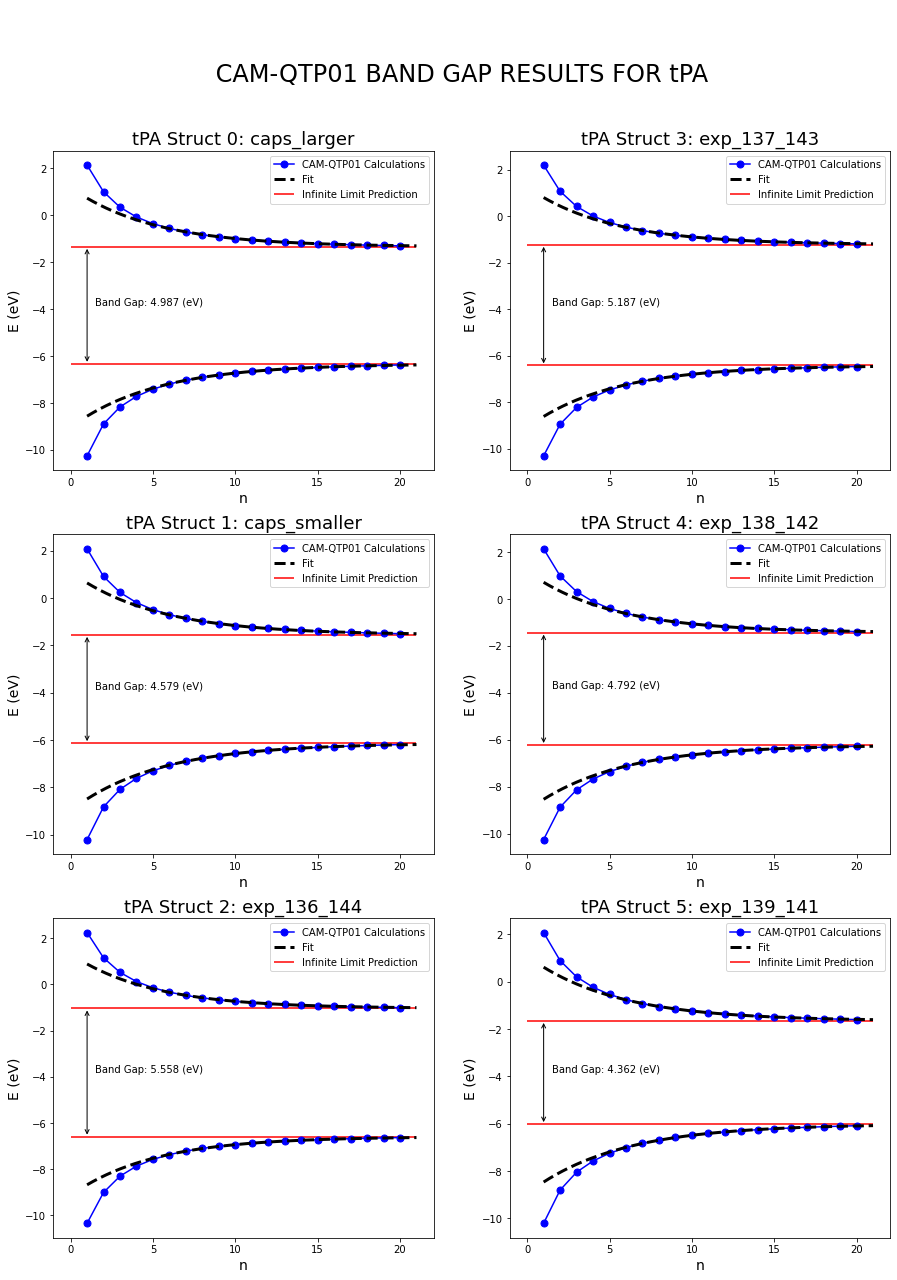

In [216]:
#define info for QTP00
parentDir=['/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/']
structs=['caps_larger','caps_smaller','exp_136_144','exp_137_143','exp_138_142','exp_139_141']
harvestHOMO=['/qtp00homos.txt']
harvestLUMO=['/qtp00lumos.txt']

# https://stackoverflow.com/questions/12935194/combinations-between-two-lists
HOMOpath=[ x+y+z for x in parentDir for y in structs for z in harvestHOMO]
LUMOpath=[ x+y+z for x in parentDir for y in structs for z in harvestLUMO]

#for x in dirNameHOMO:
#    print(x,'\n')
    
#for x in dirNameLUMO:
#    print(x,'\n')
    
    
tPA_QTP01_LUMO,tPA_QTP01_LUMOfitCoeff=getData(LUMOpath,startExt=6,endExt=20,doubleColFile=1)
tPA_QTP01_HOMO,tPA_QTP01_HOMOfitCoeff=getData(HOMOpath,startExt=6,endExt=20,doubleColFile=1)


qtp01BG=pltHOMOLUMO('CAM-QTP01',structs,tPA_QTP01_HOMO,tPA_QTP01_LUMO,tPA_QTP01_HOMOfitCoeff,tPA_QTP01_LUMOfitCoeff,[3,2])

# tPA BAND GAP FOR QTP02

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/caps_larger/qtp00lumos.txt


variables from optimization are: 
 (array([ 2.55887058,  5.04069953, -1.18159809]), array([[ 3.78069194e-03, -6.48871664e-03,  2.77085594e-04],
       [-6.48871664e-03,  1.21315832e-02, -5.80048863e-04],
       [ 2.77085594e-04, -5.80048863e-04,  3.35575158e-05]]))

 predicted HOMO for infinite system is:  -1.1815980911396702
Fit coefficients to E(n)=A*exp(-n/B)+C are:  [ 2.55887058  5.04069953 -1.18159809]
**************************************************
**************************************************
 

**************************************************
************************************************** 
 

STRUCTURE & DFT FUNCTIONAL: 

/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/caps_smaller/qtp00lumos.txt


variables from optimiza

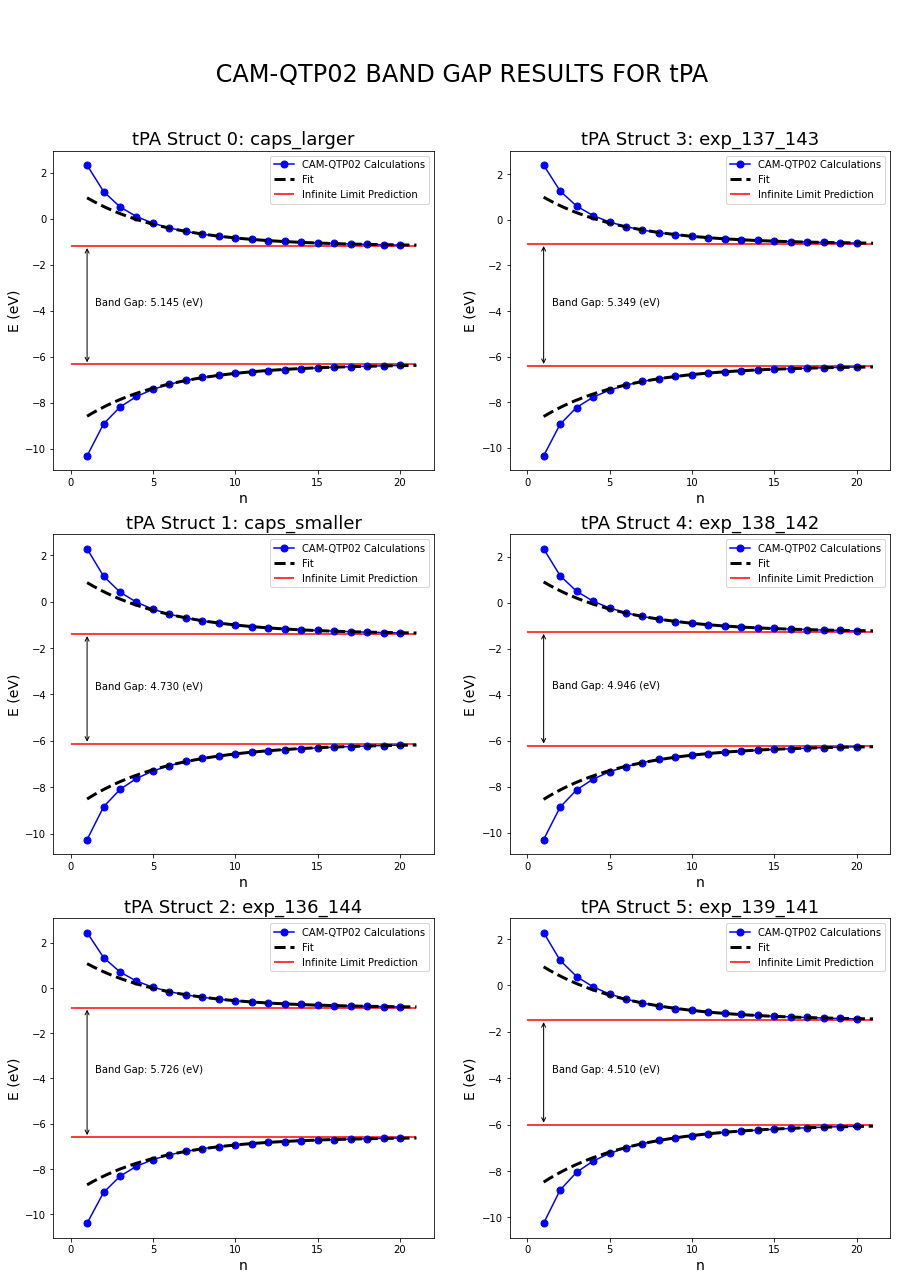

In [217]:
#define info for QTP00
parentDir=['/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/']
structs=['caps_larger','caps_smaller','exp_136_144','exp_137_143','exp_138_142','exp_139_141']
harvestHOMO=['/qtp00homos.txt']
harvestLUMO=['/qtp00lumos.txt']

# https://stackoverflow.com/questions/12935194/combinations-between-two-lists
HOMOpath=[ x+y+z for x in parentDir for y in structs for z in harvestHOMO]
LUMOpath=[ x+y+z for x in parentDir for y in structs for z in harvestLUMO]

#for x in dirNameHOMO:
#    print(x,'\n')
    
#for x in dirNameLUMO:
#    print(x,'\n')
    
    
tPA_QTP02_LUMO,tPA_QTP02_LUMOfitCoeff=getData(LUMOpath,startExt=6,endExt=20,doubleColFile=1)
tPA_QTP02_HOMO,tPA_QTP02_HOMOfitCoeff=getData(HOMOpath,startExt=6,endExt=20,doubleColFile=1)


qtp02BG=pltHOMOLUMO('CAM-QTP02',structs,tPA_QTP02_HOMO,tPA_QTP02_LUMO,tPA_QTP02_HOMOfitCoeff,tPA_QTP02_LUMOfitCoeff,[3,2])

# IP/EA-EOM-CCSD

[5, 6, 7]
variables from optimization are: 
 (array([-4.12853737,  3.28550626, -6.46457623]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))

 predicted HOMO for infinite system is:  -6.464576227220591
variables from optimization are: 
 (array([ 3.77695181,  3.31032999, -0.87810341]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))

 predicted HOMO for infinite system is:  -0.8781034057969425
testing (array([ 3.77695181,  3.31032999, -0.87810341]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))
Extrapolated CCSD Band Gap (Struct 3 BLA 0.08):  5.586472821423649
variables from optimization are: 
 (array([-4.45140994,  3.54301108, -5.98162271]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))

 predicted HOMO for infinite system is:  -5.981622711118651
variables from optimization are: 
 (array([ 4.08781073,  3.56314448, -1.39621028]), array([[inf, inf, inf],
       [inf, inf, inf],
  

/apps/python/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


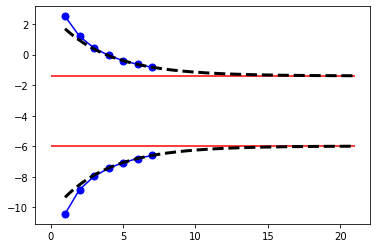

In [218]:
CCSDdata=[]
exp136HOMO=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/exp_136_144/exp136IP.txt')
exp136LUMO=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/exp_136_144/exp136EA.txt')


exp139HOMO=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/exp_139_141/exp139IP.txt')
exp139LUMO=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/exp_139_141/exp139EA.txt')


#exp139=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/exp_139_141/exp139BG.txt')


CCSDdata.append(1000)
CCSDdata.append(1000)


#x=np.arange(10,16,2)
x=[5,6,7]
print(x)

# tPA 5,6,7 is array index 4,5,6

CCSDexp136HOMO=extrapolate(x,-exp136HOMO[4:7])
CCSDexp136LUMO=extrapolate(x,exp136LUMO[4:7])
print('testing',CCSDexp136LUMO)
exp136BG=abs(CCSDexp136HOMO[0][2]-CCSDexp136LUMO[0][2])
print("Extrapolated CCSD Band Gap (Struct 3 BLA 0.08): ",exp136BG)
CCSDdata.append(exp136BG)
CCSDdata.append(1000)
CCSDdata.append(1000)

CCSDexp139HOMO=extrapolate(x,-exp139HOMO[4:7])
CCSDexp139LUMO=extrapolate(x,exp139LUMO[4:7])
exp139BG=abs(CCSDexp139HOMO[0][2]-CCSDexp139LUMO[0][2])


print('\n \n')
print("Extrapolated CCSD Band Gap (Struct 3 BLA 0.08): ",exp136BG)
print("Extrapolated CCSD Band Gap (Struct 6 BLA 0.02): ",exp139BG)
CCSDdata.append(exp139BG)

print(CCSDdata)

xData=np.arange(1,8)
extrapX=np.linspace(1,21,500)
        

A=CCSDexp139HOMO[0][0] # ** WILL NEED TO CHANGE INSIDE INDEX [X][etc]
B=CCSDexp139HOMO[0][1]
C=CCSDexp139HOMO[0][2]
plt.plot(xData,-exp139HOMO,color='b',marker='o',ms=7,label="IP/EA-EOM-CCSD Calculations")
plt.plot(extrapX,A*np.exp(-extrapX/B)+C,color='black',ls='--',linewidth=3,label=r'Fit')
plt.hlines(C,0,21,colors='r',label='Infinite Limit Prediction')

plt.plot(xData,exp139LUMO,color='b',marker='o',ms=7)
A=CCSDexp139LUMO[0][0] # ** WILL NEED TO CHANGE INSIDE INDEX [X][etc]
B=CCSDexp139LUMO[0][1]
C=CCSDexp139LUMO[0][2]
plt.plot(extrapX,A*np.exp(-extrapX/B)+C,color='black',ls='--',linewidth=3)
plt.hlines(C,0,21,colors='r')

plt.show()
        


# WRITE FINAL DFT RESULTS FOR tPA TO OUTPUT FILE FOR LATEX TABLE

In [219]:
np.savetxt('latexBG_tPAFINAL.out',(camb3lypBG,qtp00BG,qtp01BG,qtp02BG,CCSDdata),fmt="%.2f",delimiter=' & ',newline='\\\\ \n')


# CAM-B3LYP BG of tPA

In [220]:
caps_larger=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_larger/qtp00BandGap.txt')
caps_larger=caps_larger[8:21]

caps_smaller=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/caps_smaller/qtp00BandGap.txt')
caps_smaller=caps_smaller[8:21]

exp_136_144=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_136_144/qtp00BandGap.txt')
exp_136_144=exp_136_144[8:21]

exp_137_143=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_137_143/qtp00BandGap.txt')
exp_137_143=exp_137_143[8:21]

exp_138_142=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_138_142/qtp00BandGap.txt')
exp_138_142=exp_138_142[8:21]

exp_139_141=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/camb3lyp/additional_geometries/exp_139_141/qtp00BandGap.txt')
exp_139_141=exp_139_141[8:21]

In [221]:
camb3lypDATA=[]
x=np.arange(18,42,2)
#print(x)

popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_larger )
print("Extrapolated CAM-B3LYP Band Gap (Struct 1 BLA 0.05): ",popLog[0])
camb3lypDATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_smaller )
print("Extrapolated CAM-B3LYP Band Gap (Struct 2 BLA 0.03): ",popLog[0])
camb3lypDATA.append(popLog[0])
print()

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_136_144 )
print("Extrapolated CAM-B3LYP Band Gap (Struct 3 BLA 0.08): ",popLog[0])
camb3lypDATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_137_143 )
print("Extrapolated CAM-B3LYP Band Gap (Struct 4 BLA 0.06): ",popLog[0])
camb3lypDATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_138_142 )
print("Extrapolated CAM-B3LYP Band Gap (Struct 5 BLA 0.04): ",popLog[0])
camb3lypDATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_139_141 )
print("Extrapolated CAM-B3LYP Band Gap (Struct 6 BLA 0.02): ",popLog[0])
camb3lypDATA.append(popLog[0])

print(camb3lypDATA)

Extrapolated CAM-B3LYP Band Gap (Struct 1 BLA 0.05):  2.735162875203285
Extrapolated CAM-B3LYP Band Gap (Struct 2 BLA 0.03):  2.3250039095330366

Extrapolated CAM-B3LYP Band Gap (Struct 3 BLA 0.08):  3.301354665163557
Extrapolated CAM-B3LYP Band Gap (Struct 4 BLA 0.06):  2.931772203741349
Extrapolated CAM-B3LYP Band Gap (Struct 5 BLA 0.04):  2.535729969289039
Extrapolated CAM-B3LYP Band Gap (Struct 6 BLA 0.02):  2.1031831492767923
[2.735162875203285, 2.3250039095330366, 3.301354665163557, 2.931772203741349, 2.535729969289039, 2.1031831492767923]


# QTP00 BG of tPA

In [222]:

caps_larger=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp00/caps_larger/qtp00BandGap.txt')
caps_larger=caps_larger[8:21]

caps_smaller=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp00/caps_smaller/qtp00BandGap.txt')
caps_smaller=caps_smaller[8:21]

exp_136_144=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp00/exp_136_144/qtp00BandGap.txt')
exp_136_144=exp_136_144[8:21]

exp_137_143=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp00/exp_137_143/qtp00BandGap.txt')
exp_137_143=exp_137_143[8:21]

exp_138_142=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp00/exp_138_142/qtp00BandGap.txt')
exp_138_142=exp_138_142[8:21]

exp_139_141=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp00/exp_139_141/qtp00BandGap.txt')
exp_139_141=exp_139_141[8:21]

ValueError: Wrong number of columns at line 21

In [ ]:
qtp00DATA=[]
x=np.arange(18,42,2)
#print(x)

popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_larger )
print("Extrapolated QTP00 Band Gap (Struct 1 BLA 0.05): ",popLog[0])
qtp00DATA.append(popLog[0])


popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_smaller )
print("Extrapolated QTP00 Band Gap (Struct 2 BLA 0.03): ",popLog[0])
qtp00DATA.append(popLog[0])

print()

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_136_144 )
print("Extrapolated QTP00 Band Gap (Struct 3 BLA 0.08): ",popLog[0])
qtp00DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_137_143 )
print("Extrapolated QTP00 Band Gap (Struct 4 BLA 0.06): ",popLog[0])
qtp00DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_138_142 )
print("Extrapolated QTP00 Band Gap (Struct 5 BLA 0.04): ",popLog[0])
qtp00DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_139_141 )
print("Extrapolated QTP00 Band Gap (Struct 6 BLA 0.02): ",popLog[0])
qtp00DATA.append(popLog[0])

print(qtp00DATA)

# QTP01 -BG of tPA

In [ ]:
caps_larger=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/caps_larger/qtp00BandGap.txt')
caps_larger=caps_larger[8:21]

caps_smaller=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/caps_smaller/qtp00BandGap.txt')
caps_smaller=caps_smaller[8:21]

exp_136_144=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/exp_136_144/qtp00BandGap.txt')
exp_136_144=exp_136_144[8:21]

exp_137_143=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/exp_137_143/qtp00BandGap.txt')
exp_137_143=exp_137_143[8:21]

exp_138_142=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/exp_138_142/qtp00BandGap.txt')
exp_138_142=exp_138_142[8:21]

exp_139_141=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp01/additional_geometries/exp_139_141/qtp00BandGap.txt')
exp_139_141=exp_139_141[8:21]

In [ ]:
qtp01DATA=[]
x=np.arange(18,42,2)
#print(x)

popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_larger )
print("Extrapolated CAM-QTP-01 Band Gap (Struct 1 BLA 0.05): ",popLog[0])
qtp01DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_smaller )
print("Extrapolated CAM-QTP-01 Band Gap (Struct 2 BLA 0.03): ",popLog[0])
qtp01DATA.append(popLog[0])

print()

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_136_144 )
print("Extrapolated CAM-QTP-01 Band Gap (Struct 3 BLA 0.08): ",popLog[0])
qtp01DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_137_143 )
print("Extrapolated CAM-QTP-01 Band Gap (Struct 4 BLA 0.06): ",popLog[0])
qtp01DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_138_142 )
print("Extrapolated CAM-QTP-01 Band Gap (Struct 5 BLA 0.04): ",popLog[0])
qtp01DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_139_141 )
print("Extrapolated CAM-QTP-01 Band Gap (Struct 6 BLA 0.02): ",popLog[0])
qtp01DATA.append(popLog[0])

print(qtp01DATA)

# QTP02-BG of tPA

In [ ]:
caps_larger=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/caps_larger/qtp00BandGap.txt')
caps_larger=caps_larger[8:21]

caps_smaller=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/caps_smaller/qtp00BandGap.txt')
caps_smaller=caps_smaller[8:21]

exp_136_144=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/exp_136_144/qtp00BandGap.txt')
exp_136_144=exp_136_144[8:21]

exp_137_143=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/exp_137_143/qtp00BandGap.txt')
exp_137_143=exp_137_143[8:21]

exp_138_142=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/exp_138_142/qtp00BandGap.txt')
exp_138_142=exp_138_142[8:21]

exp_139_141=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/qtp02/additional_geometries/exp_139_141/qtp00BandGap.txt')
exp_139_141=exp_139_141[8:21]

In [ ]:
qtp02DATA=[]
x=np.arange(18,42,2)
print(x)
print(exp_139_141)

popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_larger )
print("Extrapolated CAM-QTP-02 Band Gap (Struct 1 BLA 0.05): ",popLog[0])
qtp02DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_smaller )
print("Extrapolated CAM-QTP-02 Band Gap (Struct 2 BLA 0.03): ",popLog[0])
qtp02DATA.append(popLog[0])

print()

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_136_144 )
print("Extrapolated CAM-QTP-02 Band Gap (Struct 3 BLA 0.08): ",popLog[0])
qtp02DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_137_143 )
print("Extrapolated CAM-QTP-02 Band Gap (Struct 4 BLA 0.06): ",popLog[0])
qtp02DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_138_142 )
print("Extrapolated CAM-QTP-02 Band Gap (Struct 5 BLA 0.04): ",popLog[0])
qtp02DATA.append(popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp_139_141 )
print("Extrapolated CAM-QTP-02 Band Gap (Struct 6 BLA 0.02): ",popLog[0])
qtp02DATA.append(popLog[0])

print(qtp02DATA)

#  CCSD-BG of tPA

In [ ]:
CCSDdata=[]
exp136=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/exp_136_144/CCbandGap136.txt')
exp139=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/exp_139_141/exp139BG.txt')
exp136=exp136[4:7] # tPA 5,6,7 is array index 4,5,6
exp139=exp139[4:7]

CCSDdata.append(1000)
CCSDdata.append(1000)

print(exp136)
print(exp139)
x=np.arange(10,16,2)
#x=np.arange(10,14,2)
print(x)

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp136 )
print("Extrapolated CCSD Band Gap (Struct 3 BLA 0.08): ",popLog[0])
CCSDdata.append(popLog[0])
CCSDdata.append(1000)
CCSDdata.append(1000)

popLog, pcov_log = curve_fit(linlaw, 1.0/x,exp139 )
print("Extrapolated CCSD Band Gap (Struct 6 BLA 0.02): ",popLog[0])
CCSDdata.append(popLog[0])

print(CCSDdata)


#popLog, pcov_log = curve_fit(linlaw, 1.0/x,caps_smaller )
#print("Extrapolated CAM-QTP-02 Band Gap (Struct 2 BLA 0.03): ",popLog[0])

# WRITE ALL tPA BANDGAP INFO TO LATEX FILE

In [ ]:

np.savetxt('latexBG_tPA.out',(camb3lypDATA,qtp00DATA,qtp01DATA,qtp02DATA,CCSDdata),fmt="%.2f",delimiter=' & ',newline='\\\\ \n')


# CYCLIC ACENES

## HOMO-LUMO PLOT - DUMINDA STRUCTURES

In [ ]:
camb3lypHOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/camb3lyp/camb3lyphomos.txt')
camb3lypLUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/camb3lyp/camb3lyplumos.txt')

qtp00HOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/qtp00/qtp00/qtp00homos.txt')
qtp00LUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/qtp00/qtp00/qtp00lumos.txt')

qtp01HOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/qtp01/qtp01homos.txt')
qtp01LUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/qtp01/qtp01lumos.txt')

qtp02HOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/qtp02/qtp02homos.txt')
qtp02LUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/acenes/qtp02/qtp02lumos.txt')

print(abs(camb3lypHOMO-camb3lypLUMO)*27.2114)
print(camb3lypLUMO)


In [ ]:
x=np.arange(1,13)

plt.plot(x,camb3lypLUMO*27.2114,'r',marker='x',label='CAMB3LYP LUMO')
plt.plot(x,camb3lypHOMO*27.2114,'r',marker='x',label='CAMB3LYP HOMO')
print(camb3lypLUMO)

plt.plot(x,qtp00LUMO*27.2114,'g',marker='x',label='qtp00 LUMO')
plt.plot(x,qtp00HOMO*27.2114,'g',marker='x',label='qtp00 HOMO')

plt.plot(x,qtp01LUMO*27.2114,'b',marker='x',label='qtp01 LUMO')
plt.plot(x,qtp01HOMO*27.2114,'b',marker='x',label='qtp01 HOMO')

plt.plot(x,qtp02LUMO*27.2114,'black',marker='x',label='qtp02 LUMO')
plt.plot(x,qtp02HOMO*27.2114,'black',marker='x',label='qtp02 HOMO')


plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

In [ ]:
print('LUMO:', camb3lypLUMO[9],'HOMO',camb3lypHOMO[9])

print("UKS LUMO: ",-0.111937314670822,"UKS HOMO",-0.168647178047726)

## HOMO-LUMO PLOT - GARNETT'S B3LYP OPTIMIZED STRUCTURES

In [ ]:
camb3lypHOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/camb3lyp/camb3lyphomos.txt')
camb3lypLUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/camb3lyp/camb3lyplumos.txt')
camb3lypBG=abs(camb3lypHOMO-camb3lypLUMO)*27.2114
print(camb3lypBG)


qtp00HOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/qtp00/qtp00homos.txt')
qtp00LUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/qtp00/qtp00lumos.txt')
qtp00BG=abs(qtp00HOMO-qtp00LUMO)*27.2114

qtp01HOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/qtp01/qtp01homos.txt')
qtp01LUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/qtp01/qtp01lumos.txt')
qtp01BG=abs(qtp01HOMO-qtp01LUMO)*27.2114

qtp02HOMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/qtp02/qtp02homos.txt')
qtp02LUMO=np.loadtxt('/blue/bartlett/z.windom/pyscf/cycle/onyxBGcalcs/Garnett_acenes/qtp02/qtp02lumos.txt')
qtp02BG=abs(qtp02HOMO-qtp02LUMO)*27.2114



ccsdHOMO=np.loadtxt('/blue/bartlett/z.windom/ACES/cycles/Garnett/ccsd/ccsdIP.txt')
ccsdLUMO=np.loadtxt('/blue/bartlett/z.windom/ACES/cycles/Garnett/ccsd/ccsdEA.txt')
ccsdBG=abs(-1*ccsdHOMO-ccsdLUMO)
print(ccsdBG)
print()
print()

ccsd_x=np.array([10,14,18]) # number of carbon atoms
popLog, pcov_log = curve_fit(linlaw, 1.0/ccsd_x,ccsdBG )
print("Extrapolated CCSD Band Gap (Garnett's acenes): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/ccsd_x,camb3lypBG[0:3] )
print("Extrapolated CAM-B3LYP Band Gap (Garnett's acenes): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/ccsd_x,qtp00BG[0:3] )
print("Extrapolated QTP00 Band Gap (Garnett's acenes): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/ccsd_x,qtp01BG[0:3] )
print("Extrapolated QTP01 Band Gap (Garnett's acenes): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/ccsd_x,qtp02BG[0:3] )
print("Extrapolated QTP02 Band Gap (Garnett's acenes): ",popLog[0])




In [ ]:
x=np.array([2,3,4,5,6,8,10,12])

plt.plot(x,camb3lypLUMO*27.2114,'r',marker='x',label='CAMB3LYP LUMO')
plt.plot(x,camb3lypHOMO*27.2114,'r',marker='x',label='CAMB3LYP HOMO')


plt.plot(x,qtp00LUMO*27.2114,'g',marker='x',label='qtp00 LUMO')
plt.plot(x,qtp00HOMO*27.2114,'g',marker='x',label='qtp00 HOMO')

plt.plot(x,qtp01LUMO*27.2114,'b',marker='x',label='qtp01 LUMO')
plt.plot(x,qtp01HOMO*27.2114,'b',marker='x',label='qtp01 HOMO')

plt.plot(x,qtp02LUMO*27.2114,'black',marker='x',label='qtp02 LUMO')
plt.plot(x,qtp02HOMO*27.2114,'black',marker='x',label='qtp02 HOMO')


plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

# EXCITED SINGLET-TRIPLET ENERGIES FOR tPA

## Structure 3 (BA 0.08) exp_136_144

In [ ]:
camb3lypSINGLET=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/camb3lypSINGLETS.txt')
camb3lypTRIPLET=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/camb3lypTRIPLETS.txt')

qtp00SINGLETS=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/qtp00SINGLETS.txt')
qtp00TRIPLETS=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/qtp00TRIPLETS.txt')

qtp01SINGLETS=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/qtp01SINGLETS.txt')
qtp01TRIPLETS=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/qtp01TRIPLETS.txt')

qtp02SINGLETS=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/qtp02SINGLETS.txt')
qtp02TRIPLETS=np.loadtxt('/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/qtp02TRIPLETS.txt')

ccsdSINGLETS=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/singletTriplet/exp_136_144/exp136singlet.txt')
ccsdTRIPLETS=np.loadtxt('/blue/bartlett/z.windom/ACES/polyacene/singletTriplet/exp_136_144/exp136triplet.txt')

In [ ]:
x=np.arange(1,21,1)
y=np.arange(1,4,1)
plt.plot(x,camb3lypSINGLET,'r',marker='x',label='camb3lypSINGLET')
plt.plot(x,camb3lypTRIPLET,'r',marker='o',label='camb3lypTRIPLET')
plt.plot(x,abs(camb3lypTRIPLET-camb3lypSINGLET),'r',marker='P',label='camb3lyp GAP')

plt.plot(y,ccsdSINGLETS,'indigo',marker='^',label='EE-EOM-CCSD SINGLET')
plt.plot(y,ccsdTRIPLETS,'indigo',marker='^',label='EE-EOM-CCSD TRIPLET')
plt.plot(y,abs(ccsdTRIPLETS-ccsdSINGLETS),'indigo',marker='^',label='EE-EOM-CCSD TRIPLET-SINGLET GAP')


plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

In [ ]:
x=np.arange(1,21,1)
plt.plot(x,qtp00SINGLETS,'b',marker='x',label='qtp00SINGLET')
plt.plot(x,qtp00TRIPLETS,'b',marker='o',label='qtp00TRIPLET')
plt.plot(x,abs(qtp00TRIPLETS-qtp00SINGLETS),'b',marker='P',label='qtp00 GAP')

plt.plot(y,ccsdSINGLETS,'indigo',marker='^',label='EE-EOM-CCSD SINGLET')
plt.plot(y,ccsdTRIPLETS,'indigo',marker='^',label='EE-EOM-CCSD TRIPLET')
plt.plot(y,abs(ccsdTRIPLETS-ccsdSINGLETS),'indigo',marker='^',label='EE-EOM-CCSD TRIPLET-SINGLET GAP')



plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

In [ ]:
x=np.arange(1,21,1)
plt.plot(x,qtp01SINGLETS,'g',marker='x',label='qtp01SINGLET')
plt.plot(x,qtp01TRIPLETS,'g',marker='o',label='qtp01TRIPLET')
plt.plot(x,abs(qtp01TRIPLETS-qtp01SINGLETS),'g',marker='P',label='qtp01 GAP')

plt.plot(y,ccsdSINGLETS,'indigo',marker='^',label='EE-EOM-CCSD SINGLET')
plt.plot(y,ccsdTRIPLETS,'indigo',marker='^',label='EE-EOM-CCSD TRIPLET')
plt.plot(y,abs(ccsdTRIPLETS-ccsdSINGLETS),'indigo',marker='^',label='EE-EOM-CCSD TRIPLET-SINGLET GAP')


plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

In [ ]:
x=np.arange(1,21,1)
plt.plot(x,qtp02SINGLETS,'black',marker='x',label='qtp02SINGLET')
plt.plot(x,qtp02TRIPLETS,'black',marker='o',label='qtp02TRIPLET')
plt.plot(x,abs(qtp02TRIPLETS-qtp02SINGLETS),'black',marker='P',label='qtp02 GAP')

plt.plot(y,ccsdSINGLETS,'indigo',marker='^',label='EE-EOM-CCSD SINGLET')
plt.plot(y,ccsdTRIPLETS,'indigo',marker='^',label='EE-EOM-CCSD TRIPLET')
plt.plot(y,abs(ccsdTRIPLETS-ccsdSINGLETS),'indigo',marker='^',label='EE-EOM-CCSD TRIPLET-SINGLET GAP')


plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

In [ ]:
x=np.arange(18,42,2)
finalCAMB3LYP=abs(camb3lypTRIPLET-camb3lypSINGLET)
finalQTP00=abs(qtp00TRIPLETS-qtp00SINGLETS)
finalQTP01=abs(qtp01TRIPLETS-qtp01SINGLETS)
finalQTP02=abs(qtp02TRIPLETS-qtp02SINGLETS)
finalccsd=abs(ccsdTRIPLETS-ccsdSINGLETS)
y=np.arange(4,8,2)

popLog, pcov_log = curve_fit(linlaw, 1.0/x,finalCAMB3LYP[8:] )
print("Extrapolated CAMB3LYP singlet-triplet Gap (Struct 3 BLA 0.08): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,finalQTP00[8:] )
print("Extrapolated QTP00 singlet-triplet Gap (Struct 3 BLA 0.08): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,finalQTP01[8:] )
print("Extrapolated QTP01 singlet-triplet Gap (Struct 3 BLA 0.08): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/x,finalQTP02[8:] )
print("Extrapolated QTP20 singlet-triplet Gap (Struct 3 BLA 0.08): ",popLog[0])

popLog, pcov_log = curve_fit(linlaw, 1.0/y,finalccsd[1:] )
print("Extrapolated EE-EOM-CCSD singlet-triplet Gap (Struct 3 BLA 0.08): ",popLog[0])

# SINGLET/TRIPLET FOR EXP 136 tPA

## triplet Bu

In [ ]:
path='/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/finalCopy/'
ending='TRIPLET_Bu.txt'
camb3lyp=path+'camb3lyp'+ending
qtp00=path+'qtp00'+ending
qtp01=path+'qtp01'+ending
qtp02=path+'qtp02'+ending

camb3lypPLT=np.loadtxt(camb3lyp)
qtp00PLT=np.loadtxt(qtp00)
qtp01PLT=np.loadtxt(qtp01)
qtp02PLT=np.loadtxt(qtp02)
x=np.arange(1,21,1)
plt.plot(x,camb3lypPLT,'r',marker='x',label='CAMB3LYP')
plt.plot(x,qtp00PLT,'g',marker='x',label='qtp00') #missing acene10 info
plt.plot(x,qtp01PLT,'b',marker='x',label='qtp01')
plt.plot(x,qtp02PLT,'black',marker='x',label='qtp02')



plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

## singlet Ag

In [ ]:
path='/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/finalCopy/'
ending='SINGLET_Ag.txt'
camb3lyp=path+'camb3lyp'+ending
qtp00=path+'qtp00'+ending
qtp01=path+'qtp01'+ending
qtp02=path+'qtp02'+ending

camb3lypPLT=np.loadtxt(camb3lyp)
qtp00PLT=np.loadtxt(qtp00)
qtp01PLT=np.loadtxt(qtp01)
qtp02PLT=np.loadtxt(qtp02)
x=np.arange(1,21,1)
plt.plot(x,camb3lypPLT,'r',marker='x',label='CAMB3LYP')
plt.plot(x,qtp00PLT,'g',marker='x',label='qtp00') #missing acene10 info
plt.plot(x,qtp01PLT,'b',marker='x',label='qtp01')
plt.plot(x,qtp02PLT,'black',marker='x',label='qtp02')



plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

## singlet Bu

In [ ]:
path='/blue/bartlett/z.windom/pyscf/acenes/ONYXsinglettriplet/exp_136_144/finalCopy/'
ending='SINGLET_Bu.txt'
camb3lyp=path+'camb3lyp'+ending
qtp00=path+'qtp00'+ending
qtp01=path+'qtp01'+ending
qtp02=path+'qtp02'+ending

camb3lypPLT=np.loadtxt(camb3lyp)
qtp00PLT=np.loadtxt(qtp00)
qtp01PLT=np.loadtxt(qtp01)
qtp02PLT=np.loadtxt(qtp02)
x=np.arange(1,21,1)
plt.plot(x,camb3lypPLT,'r',marker='x',label='CAMB3LYP')
plt.plot(x,qtp00PLT,'g',marker='x',label='qtp00') #missing acene10 info
plt.plot(x,qtp01PLT,'b',marker='x',label='qtp01')
plt.plot(x,qtp02PLT,'black',marker='x',label='qtp02')



plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

# SINGLET/TRIPLETS FOR GARNET ACENES

## triplets

In [ ]:
path='/blue/bartlett/z.windom/pyscf/cycle/ONYXsinglettriplet/Garnett/'
ending='TRIPLET_B2.txt'
camb3lyp=path+'camb3lyp'+ending
qtp00=path+'qtp00'+ending
qtp01=path+'qtp01'+ending
qtp02=path+'qtp02'+ending

camb3lypPLT=np.loadtxt(camb3lyp)
qtp00PLT=np.loadtxt(qtp00)
qtp01PLT=np.loadtxt(qtp01)
qtp02PLT=np.loadtxt(qtp02)
x=np.array([2,3,4,5,6,8,10,12])



In [ ]:
plt.plot(x,camb3lypPLT,'r',marker='x',label='CAMB3LYP')
plt.plot(x,qtp00PLT,'g',marker='x',label='qtp00') #missing acene10 info
plt.plot(x,qtp01PLT,'b',marker='x',label='qtp01')
plt.plot(x,qtp02PLT,'black',marker='x',label='qtp02')



plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

## SINGLET A1

In [ ]:
path='/blue/bartlett/z.windom/pyscf/cycle/ONYXsinglettriplet/Garnett/'
ending='SINGLET_A1.txt'
camb3lyp=path+'camb3lyp'+ending
qtp00=path+'qtp00'+ending
qtp01=path+'qtp01'+ending
qtp02=path+'qtp02'+ending
print(camb3lyp)
camb3lypPLT=np.loadtxt(camb3lyp)
qtp00PLT=np.loadtxt(qtp00)
qtp01PLT=np.loadtxt(qtp01)
qtp02PLT=np.loadtxt(qtp02)

In [ ]:
plt.plot(x,camb3lypPLT,'r',marker='x',label='CAMB3LYP')
plt.plot(x,qtp00PLT,'g',marker='x',label='qtp00') #missing acene10 info
plt.plot(x,qtp01PLT,'b',marker='x',label='qtp01')
plt.plot(x,qtp02PLT,'black',marker='x',label='qtp02')



plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

## SINGLET B2

In [ ]:
path='/blue/bartlett/z.windom/pyscf/cycle/ONYXsinglettriplet/Garnett/'
ending='SINGLET_B2.txt'
camb3lyp=path+'camb3lyp'+ending
qtp00=path+'qtp00'+ending
qtp01=path+'qtp01'+ending
qtp02=path+'qtp02'+ending
print(camb3lyp)
camb3lypPLT=np.loadtxt(camb3lyp)
qtp00PLT=np.loadtxt(qtp00)
qtp01PLT=np.loadtxt(qtp01)
qtp02PLT=np.loadtxt(qtp02)

In [ ]:
plt.plot(x,camb3lypPLT,'r',marker='x',label='CAMB3LYP')
plt.plot(x,qtp00PLT,'g',marker='x',label='qtp00') #missing acene10 info
plt.plot(x,qtp01PLT,'b',marker='x',label='qtp01')
plt.plot(x,qtp02PLT,'black',marker='x',label='qtp02')



plt.legend(loc='best', bbox_to_anchor=(0.95, 0.2, 0.5, 0.5))
plt.ylabel('Energy (eV)')
plt.xlabel('Monomer Counter')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
nbands = 8#take from outfile
sp_points = [0.         ,1.00191458, 2.15882589 ,2.73728154, 3.14631146, 4.3734012 ]# take from outfile
kpath=[0.0, 0.06679430544040572, 0.13358861088081145, 0.20038291632121719, 0.2671772217616229, 0.3339715272020286, 0.40076583264243437, 0.4675601380828401, 0.5343544435232458, 0.6011487489636516, 0.6679430544040572, 0.734737359844463, 0.8015316652848687, 0.8683259707252744, 0.9351202761656802, 1.001914581606086, 1.0661874319833398, 1.1304602823605938, 1.1947331327378476, 1.2590059831151015, 1.3232788334923553, 1.3875516838696091, 1.4518245342468632, 1.516097384624117, 1.5803702350013709, 1.644643085378625, 1.7089159357558787, 1.7731887861331326, 1.8374616365103864, 1.9017344868876402, 1.9660073372648943, 2.0302801876421483, 2.094553038019402, 2.158825888396656, 2.22309873877391, 2.2873715891511637, 2.3516444395284175, 2.4159172899056713, 2.4801901402829256, 2.5444629906601794, 2.6087358410374333, 2.673008691414687, 2.737281541791941, 2.805453194313858, 2.873624846835775, 2.9417964993576913, 3.009968151879608, 3.078139804401525, 3.146311456923442, 3.204744301942228, 3.263177146961014, 3.3216099919797997, 3.3800428369985855, 3.4384756820173714, 3.4969085270361573, 3.555341372054943, 3.613774217073729, 3.6722070620925154, 3.730639907111301, 3.789072752130087, 3.8475055971488725, 3.905938442167659, 3.9643712871864447, 4.022804132205231, 4.081236977224016, 4.139669822242802, 4.198102667261589, 4.256535512280374, 4.3149683572991595, 4.373401202317946]

e_kn =[[-12.818358643616712, -12.510415989973165, -12.141783198914444, -11.73103280051362, -11.31779430847563, -10.990132715620511, -10.893546295589339, -11.091674904868116, -11.465351420801401, -11.884582680606323, -12.282962307763091, -12.630932989996092, -12.913741813615154, -13.122088373612268, -13.24949549970672, -13.292317455886693, -13.272469753930555, -13.213102139203494, -13.114813468601547, -12.978722104758347, -12.806416223851688, -12.599776139777571, -12.36082371501687, -12.09173632317287, -11.79508134769693, -11.474260390601918, -11.134117983571041, -10.781651625298611, -10.426710578287622, -10.082398349175596, -9.764525864397894, -9.489163819869876, -9.26812878818452, -9.104731542956909, -9.223333579039467, -9.524885655234376, -9.852392475517021, -10.171309366334741, -10.469755079845331, -10.741567121723277, -10.982887445597816, -11.19105265610975, -11.364109497423255, -11.481755582667173, -11.578852470071006, -11.654898033829758, -11.70950046436276, -11.742376641164208, -11.753354614497399, -11.645819004281092, -11.496725949973246, -11.31067114665836, -11.095306212650762, -10.864247460873905, -10.642845671643014, -10.47700621757683, -10.432730202698387, -10.553514670178416, -10.810786234867756, -11.139686553861852, -11.490007552056754, -11.832985815120804, -12.153117612252705, -12.44177384667722, -12.693662661669183, -12.904994533992237, -13.072677736829247, -13.194181748542404, -13.267714488780049, -13.292317455886693],[-3.1261599960091213, -4.262386980263765, -5.31613972072041, -6.25631553122581, -7.03883193510268, -7.575503448503947, -7.7222311067418055, -7.415908533896045, -6.774653117385123, -5.9272945502329915, -4.941616090866898, -3.8540043965645867, -2.6966041050973333, -1.5242803907908833, -0.48500169752944855, -8.225269446535306e-05, -0.21422012731525378, -0.7432021071648525, -1.4148567631405815, -2.1295467153194907, -2.8402365799505627, -3.52437661109422, -4.170994836917716, -4.775240770378432, -5.335754236490234, -5.853088550569419, -6.3285949157838255, -6.763620114542113, -7.159011371334679, -7.514930217215948, -7.8309324565788065, -8.106221978965396, -8.339960380260344, -8.531522534164456, -8.422779780385993, -8.109478401503255, -7.743851976722036, -7.363505011239141, -6.992403041150448, -6.658266263715406, -6.390661201254356, -6.20713148839888, -6.101257917872373, -6.056943581876109, -6.035613968144156, -6.027614682737304, -6.0261040741657785, -6.026751136338198, -6.027212405087266, -6.021588856322412, -6.043780114736518, -6.143546680424393, -6.380494795513335, -6.747278490052114, -7.1513362075647375, -7.483396427562597, -7.642871175050404, -7.569237530576278, -7.282003704107918, -6.840458168118277, -6.2910455753797185, -5.660181231505224, -4.96261930469542, -4.208322259584318, -3.4069338499996107, -2.5718218796520262, -1.7267065227992682, -0.9214890535999519, -0.2711025527574065, -8.225269446459779e-05],[-0.6984546919638878, -0.9838017885680316, -1.2301139053690358, -1.4220971461507514, -1.5547315361499479, -1.6287281835540353, -1.6463235503845617, -1.608275994049001, -1.5130596409667205, -1.3585600599620298, -1.1456479954622654, -0.8825716594167536, -0.5895800271256874, -0.30407550589037674, -0.08461772872489334, -7.446940436528493e-13, -0.09258567015717831, -0.3467955337134814, -0.7128225295103295, -1.1446837609930094, -1.6101924620786585, -2.0880290922666114, -2.563119025329562, -3.023628303915017, -3.459337329587339, -3.860658160010916, -4.217852216604284, -4.520299494638351, -4.75587992388576, -4.910780194713074, -4.970459897601841, -4.922881687307451, -4.764471100871148, -4.507052900903299, -4.330155658778364, -4.1121352905698245, -3.881884348944958, -3.7244463825264145, -3.7069698878805095, -3.6662342738323277, -3.5315130135141595, -3.29482531499902, -3.013442664394545, -2.6999903017664693, -2.4295271537114282, -2.285288692147745, -2.2163019197569254, -2.1816542917072654, -2.1708462962127575, -2.814500127542402, -3.443206382903429, -3.9530369186390337, -4.252146185439857, -4.322454238199502, -4.226330696127295, -4.026447661325828, -3.759296528526916, -3.4454355062116013, -3.0984925411788384, -2.729378392029521, -2.3480357378669026, -1.9641211715147775, -1.7440821541254894, -1.5012441443885702, -1.2186748017335531, -0.9079095538753058, -0.5893952404364091, -0.2969526224463608, -0.08127424356248623, -7.333650267615788e-13],[-0.6984546919636242, -0.983801788567904, -1.230113905368603, -1.4220971461502123, -1.5547315361494758, -1.6287281835537248, -1.6463235503842912, -1.6082759940486384, -1.5130596409662205, -1.3585600599615162, -1.1456479954619376, -0.8825716594166872, -0.5895800271252991, -0.30407550588974985, -0.08461772872416526, -6.042142342010948e-15, -0.013798304692571066, -0.055740069898639805, -0.12726976530640824, -0.23018383231074915, -0.36585878225354285, -0.5344393165666315, -0.7341972522112485, -0.9612383688359809, -1.2096406573341354, -1.471981420072466, -1.7401012231224904, -2.005903780830976, -2.2620155619444127, -2.5022045849631604, -2.7215441635724065, -2.916370778408992, -3.084112725544657, -3.223063239517834, -3.297677888177286, -3.390437699634655, -3.476120870196998, -3.4647012237798367, -3.276716047688136, -3.0560749218150325, -2.8517453538380084, -2.661845155899961, -2.445484008476867, -2.3036386801087136, -2.118562120294514, -1.8364968092930998, -1.5458710477759594, -1.3338478778911798, -1.2558127233270304, -1.3126757249002683, -1.4355166891867146, -1.5968128636707715, -1.7697962580423119, -1.9331204577457675, -2.0719815278053844, -2.17733149284519, -2.244330258115927, -2.2706412584460716, -2.2549427961640793, -2.1959323299748936, -2.0919966655132223, -1.9415731749383034, -1.5872687914104195, -1.22723047814021, -0.8939930499739337, -0.5978787939658128, -0.349625706969295, -0.16035480392834142, -0.040938257287183366, 0.0],[3.729205601315221, 3.5981536812065364, 3.477931876697664, 3.3792688501931347, 3.3081682241657293, 3.2672897441036386, 3.257427717709176, 3.2786826824366484, 3.330792325921272, 3.4124434888979733, 3.5199229027425796, 3.6456468428774866, 3.7768356585647656, 3.8939946519563127, 3.9631894896510915, 3.907976586702406, 3.9318949216006507, 4.0039984838647475, 4.125402809994899, 4.222577112868883, 4.32641621090424, 4.4402621456551294, 4.555566734952208, 4.6614158242496835, 4.745562668489208, 4.796316366018128, 4.80520188924537, 4.76957152378987, 4.693821251100384, 4.588330895683188, 4.466607174760592, 4.342090366036463, 4.225868706043002, 4.125689568893614, 4.128138536205555, 4.182227833186667, 4.186832353521543, 4.091699003865428, 3.974093011268683, 3.9169429953132977, 3.957636688306227, 4.101804457841731, 4.329526280760715, 4.4199298236518425, 4.480111168830284, 4.4153381806834, 4.213023678142598, 4.0126388236639166, 3.932519988093227, 4.36838969753311, 4.664013824773199, 4.787587911484888, 4.803104493604905, 4.770410499882279, 4.72345669769429, 4.677846674194196, 4.637876826284683, 4.600964512435429, 4.561082032150217, 4.512017599713698, 4.4502507726271645, 4.376585332594252, 4.2958909732134165, 4.215248033771762, 4.141515136153725, 4.079110996094173, 4.027650004133311, 3.9780229782926306, 3.928545785736294, 3.907976586702407],[4.964127573590381, 5.4210564740401, 5.819967506805625, 6.128328338653426, 6.33649585413971, 6.449566052649984, 6.476021639303357, 6.41859258372944, 6.2717357517162355, 6.026911090154057, 5.683167164446183, 5.257887533677531, 4.792850794924076, 4.354580686084374, 4.030023115857963, 3.907994251583766, 3.9813538566530666, 4.0620385730204625, 4.134275839518911, 4.297605347335062, 4.522080573433966, 4.799818231971006, 5.1309069995015175, 5.514222727126341, 5.947239029509648, 6.425933387919588, 6.944728369723038, 7.4963972536110415, 8.07188315712329, 8.660029956264902, 9.247292464344468, 8.755505775726958, 7.85526341118191, 6.806911899313138, 6.30200811385021, 5.929873652824602, 5.80294433334023, 5.957307897804349, 6.276111109464725, 6.604925443427929, 6.7971136848466145, 6.730709908524427, 6.389677594512102, 6.069576816772033, 5.762280738471154, 5.606053967434816, 5.659453981486513, 5.815976453335172, 5.914400349388369, 6.062312932870176, 6.3259425117977335, 6.656167926246132, 7.004158942195609, 7.328626422037256, 7.598999009697755, 7.795622024195405, 7.4484394176225335, 6.997478268117612, 6.568210346097278, 6.1632414061184955, 5.783597033546901, 5.430260200085451, 5.1052283297079235, 4.81191453122846, 4.5548650753847015, 4.339247000358239, 4.1711598663480265, 4.059383468676868, 3.9872645626797008, 3.9079942515837747],[4.964127573590585, 5.421056474040334, 5.819967506805806, 6.128328338653525, 6.33649585413995, 6.4495660526503205, 6.476021639303767, 6.418592583729706, 6.271735751716393, 6.026911090154171, 5.683167164446355, 5.257887533677756, 4.7928507949242425, 4.354580686084677, 4.0300231158585, 3.9079942515844, 3.987582874629906, 4.1843308115327025, 4.4836316323422185, 4.854822082397763, 5.28759696131039, 5.779853241828401, 6.330858043680374, 6.935685289021344, 7.5800325111490405, 8.234720597773697, 8.850605618306474, 9.35674112769125, 9.666539168192608, 9.695936920495262, 9.391363425527006, 9.817564563613738, 10.352312425739186, 10.83119813186018, 10.99838715086667, 11.035108308153983, 10.907931978351364, 10.650488939844836, 10.32860254739654, 9.961407778730898, 9.500923272255772, 8.954822611536878, 8.409411310668595, 7.992337093713562, 7.605644798171243, 7.252114169979619, 6.932046167648112, 6.662705232089173, 6.53327879988873, 6.928465099590413, 7.543732361855829, 8.3210160279682, 8.90524353506287, 8.791745968692942, 8.379409917876545, 7.914525981656174, 7.907986228947267, 7.9319255836169615, 7.866781475537606, 7.713429972810473, 7.47370317773105, 7.151205800154795, 6.7530328276095295, 6.291646942257134, 5.786328530405593, 5.264182226751846, 4.761461813999706, 4.326199450297811, 4.020173695062614, 3.907994251584403],[7.450381143446516, 8.8639033789907, 10.311155588592909, 11.714021520190803, 12.923010164117054, 13.727593207916817, 13.936807021863665, 13.493653116145913, 12.51519522091137, 11.213001377379557, 9.78067987715192, 8.339706587633914, 6.949123079324682, 5.651412029258465, 4.573971821640781, 4.162090228827197, 4.331901490537197, 4.8876752292776695, 5.641069206703861, 6.452747073563264, 7.248400596182285, 7.98020740514639, 8.616902656473162, 9.143248875960575, 9.560796598837213, 9.88599128615829, 10.144515193075646, 10.363428439601295, 10.564239918321348, 10.759430230264293, 10.952711856321391, 11.14145242346758, 11.31945740400354, 11.479146334807753, 11.497107507714828, 11.420760677358777, 11.292418030545742, 11.099536814553494, 10.812438997644115, 10.476100514381729, 10.242722529234946, 10.222235766516203, 10.374004218775628, 10.566826061742516, 10.762683215088153, 10.935135683197972, 11.067638754040996, 11.150464484406205, 11.178587049540512, 10.918555886901649, 10.58694394816275, 10.250632431383305, 10.179214928619677, 10.777916704594418, 11.552928389832548, 12.172167418124724, 12.523159950621164, 12.569816210996569, 12.330434553340622, 11.857616613218063, 11.213540990638899, 10.451376759684765, 9.608755166408406, 8.710881322257581, 7.777391852239484, 6.829127039315137, 5.895914253414176, 5.033677039330897, 4.375782810679188, 4.162090228827219]]
au2ev = 27.21139
emin = -1*au2ev
emax = 1*au2ev
#print(np.array(kpath).shape)
#print(len(kpath[1]))        
print(len(e_kn))
print(len(e_kn[1]))
for n in range(nbands):
#    plt.plot(kpath, [e[n]*au2ev for e in e_kn], color='#87CEEB')

    arr=e_kn
#    print('arr: ', arr.tolist())
    print(len(arr),len(arr[0]),len(kpath))
    plt.plot(kpath, arr[n], color='#4169E1',label='test for pbe0' )#if n==0 else "")
print('kpath in loop:', kpath)

for p in sp_points:
    plt.plot([p, p], [emin, emax], 'k-')
plt.plot([0, sp_points[-1]], [0, 0], 'k-')
plt.xticks(sp_points, ['$%s$' % n for n in ['L', r'\Gamma', 'X', 'W', 'K', r'\Gamma']], fontsize=18)
plt.plot([0, sp_points[-1]], [0, 0], 'k-')
plt.yticks([-20,-10,0,10,20],[-20,-10,0,10,20],fontsize=18)
plt.axis(xmin=0, xmax=sp_points[-1], ymin=emin, ymax=emax)
plt.xlabel('k-vector',fontsize=20)
plt.ylabel(r'$\epsilon_{nk}$ (eV)',fontsize=20)
plt.legend()
#plt.savefig("bandStruct.png",dpi=1000,format="png")

plt.show()
